### QED-C Application-Oriented Benchmarks - Hamiltonian Simulation with HamLib - Observables - CUDA Quantum

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one a variation of this benchmark.

This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Note: This set of benchmarks exercises new observable-oriented assessments currently under development.
This is a WORK-IN-PROGRESS.


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
min_qubits=4
max_qubits=24
skip_qubits=1
max_circuits=1
num_shots=10000

K = 1             # number of Trotter steps
t = 0.1           # total evolution time

# initial state can be "checkerboard", "ghz", or "random"
init_state = "checkerboard"

# not used by cudaq (for now)
group_method = "simple"   # method to generate commuting groups
                            # None, "simple", or "SpinOperator"

# this is the default option for CUDA Q
group_method = "SpinOperator"

hub=""; group=""; project=""
provider_backend = None

exec_options = {}

backend_id="nvidia"
api = "cudaq"


In [3]:
# Configure benchmark library modules
import sys
sys.path.insert(1, "../_common")
sys.path.insert(1, "../_common/cudaq")

import execute
execute.verbose = False
execute.verbose_time = False
#execute.noise = None

# Configure paths for hamlib benchmark modules
sys.path.insert(1, "_common")
sys.path.insert(1, "cudaq")

# ... access to HamLib datasets
import hamlib_utils
hamlib_utils.verbose = False

# ... for api-specific kernel functions (circuits)
import hamlib_simulation_kernel
hamlib_simulation_kernel.verbose = False

# ... for high-level HamLib simulation benchmark loop
import hamlib_simulation_benchmark
hamlib_simulation_benchmark.verbose = False

#####################
# use re-ordered list from Spin Operator for Trotter circuit creation (default = True)
hamlib_simulation_kernel.use_commuting_terms = True

# place resulting data and images into a folder with "test" suffix
import metrics
metrics.data_suffix = "_paper"
hamlib_simulation_benchmark.data_suffix = "_paper"

hamlib_simulation_benchmark.max_qubits_exact = 16


### Hamiltonian Simulation - Transverse Field Ising Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Mar 30, 2025 23:05:13 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... number of terms in Hamiltonian = 8
... quantum execution time = 0.154
... exact computation time = 0.005 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -3.3934
    ==> Simulation Quality: 0.848

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... number of terms in Hamiltonian = 10
... quantum execution time = 0.005
... exact computation time = 0.008 sec

    Exact expectation value, computed classically: -3.0
    Estimated expectation value, from quantum algorithm: -2.9789
    ==> Simulation Quality: 0.993

************
Executing [1] circuits with num_qubits = 6
... dataset_name = g

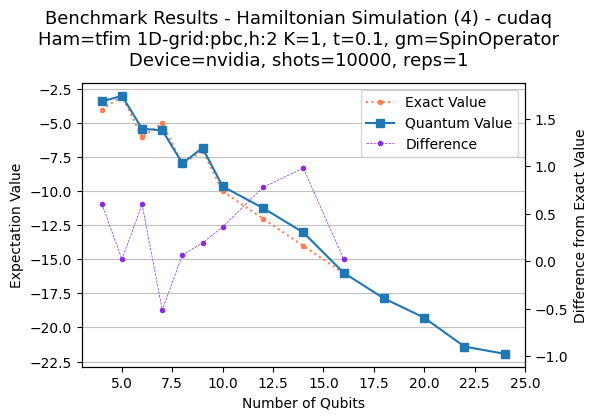

----- Expectation Time Plot -----


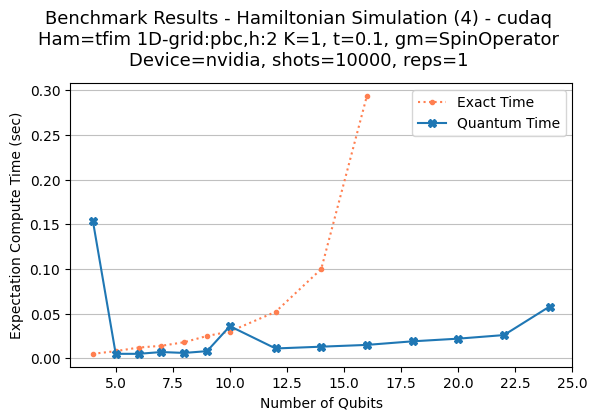

In [4]:
# Transverse Field Ising Model - 1D grid pbc h=2
hamiltonian_name = 'condensedmatter/tfim/tfim'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=4, hamiltonian = hamiltonian_name, K = K, t = t,
                hamiltonian_params = hamiltonian_params,  
                do_observables = True, group_method = group_method,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options,
                api=api)

### Hamiltonian Simulation - Heisenberg Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Mar 30, 2025 23:05:19 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... number of terms in Hamiltonian = 16
... quantum execution time = 0.006
... exact computation time = 0.009 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -3.6759
    ==> Simulation Quality: 0.919

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... number of terms in Hamiltonian = 20
... quantum execution time = 0.007
... exact computation time = 0.013 sec

    Exact expectation value, computed classically: -1.0
    Estimated expectation value, from quantum algorithm: -4.8946
    ==> Simulation Quality: 4.895

************
Executing [1] circuits with num_qubits = 6
... dataset_name = 

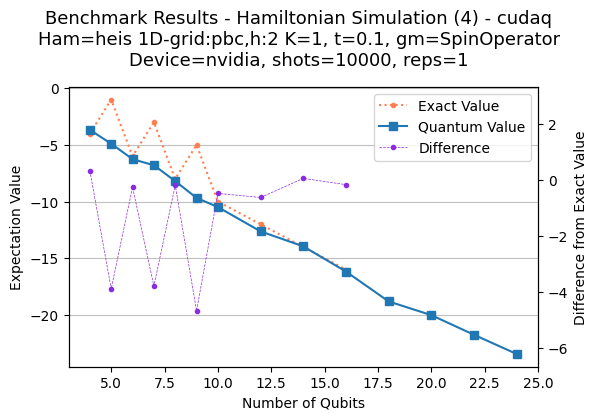

----- Expectation Time Plot -----


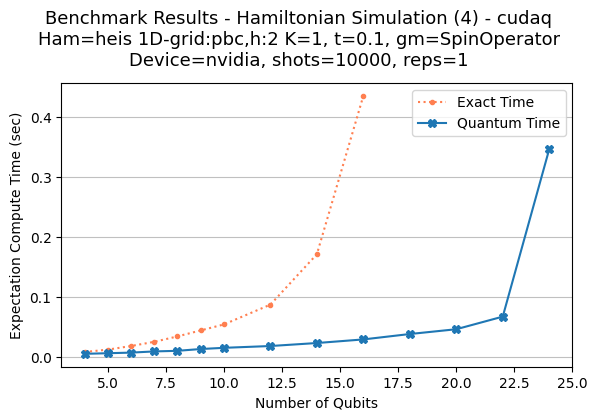

In [5]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/heisenberg/heis'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params,
            do_observables = True, group_method = group_method,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Fermi-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Mar 30, 2025 23:05:22 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-2_U-12_enc-bk
... number of terms in Hamiltonian = 11
... quantum execution time = 0.005
... exact computation time = 0.007 sec

    Exact expectation value, computed classically: -0.0
    Estimated expectation value, from quantum algorithm: 0.0381
    ==> Simulation Quality: 0.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-3_U-12_enc-bk
... number of terms in Hamiltonian = 22
... quantum execution time = 0.008
... exact computation time = 0.018 sec

    Exact expectation value, computed classically: -0.0
    Estimated expectation value, from quantum algorithm: 0.1209
    ==> Simulation Quality: 0.0

************
Executing [1] circuits with num_qubits = 8
...

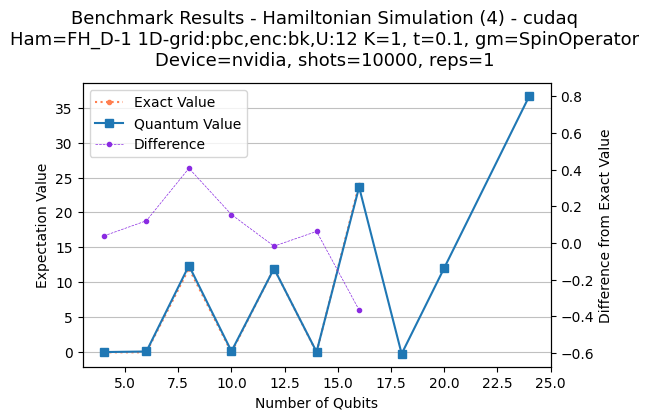

----- Expectation Time Plot -----


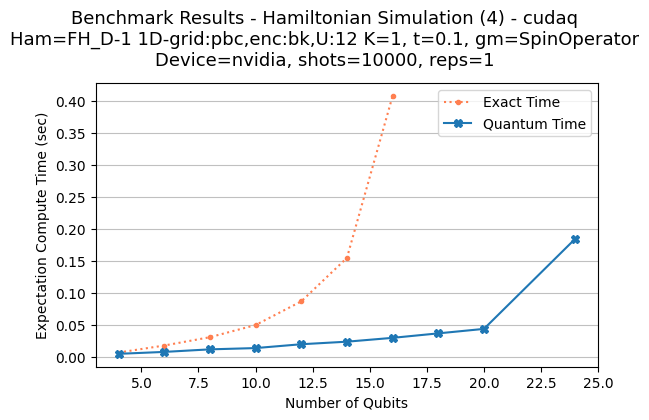

In [6]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/fermihubbard/FH_D-1'
hamiltonian_params = { "1D-grid": "pbc", "enc": "bk", "U":12 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params,
            do_observables = True, group_method = group_method,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Bose-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Mar 30, 2025 23:05:26 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-2_U-10_enc-gray_d-4
... number of terms in Hamiltonian = 39
... quantum execution time = 0.015
... exact computation time = 0.02 sec

    Exact expectation value, computed classically: 60.0
    Estimated expectation value, from quantum algorithm: 58.1174
    ==> Simulation Quality: 0.969

************
Executing [1] circuits with num_qubits = 6
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-3_U-10_enc-gray_d-4
... number of terms in Hamiltonian = 74
... quantum execution time = 0.029
... exact computation time = 0.056 sec

    Exact expectation value, computed classically: 90.0
    Estimated expectation value, from quantum algorithm: 88.6789
    ==> Simulation Quality: 0.985

************
Executing [1] circuits 

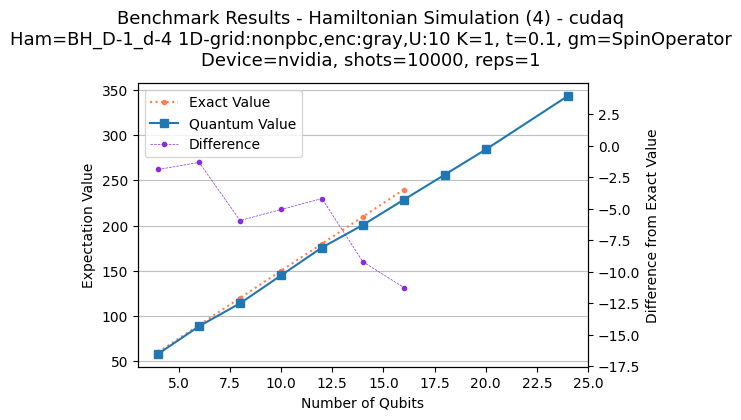

----- Expectation Time Plot -----


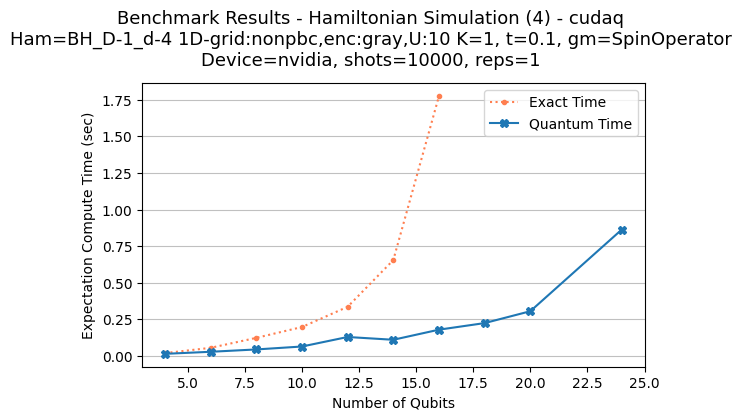

In [7]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/bosehubbard/BH_D-1_d-4'
hamiltonian_params = { "1D-grid": "nonpbc", "enc": "gray", "U":10 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = 0.1,
            hamiltonian_params = hamiltonian_params,
            do_observables = True, group_method = group_method,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Random Max3Sat


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Mar 30, 2025 23:05:33 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = max3sat_n-4_ratio-2_rinst-02
... number of terms in Hamiltonian = 12
... quantum execution time = 0.005
... exact computation time = 0.007 sec

    Exact expectation value, computed classically: 7.0
    Estimated expectation value, from quantum algorithm: 7.0
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 5
... dataset_name = max3sat_n-5_ratio-2_rinst-02
... number of terms in Hamiltonian = 17
... quantum execution time = 0.006
... exact computation time = 0.012 sec

    Exact expectation value, computed classically: 8.0
    Estimated expectation value, from quantum algorithm: 8.0
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = max3sat_n-6_ratio-2_rinst-02
...

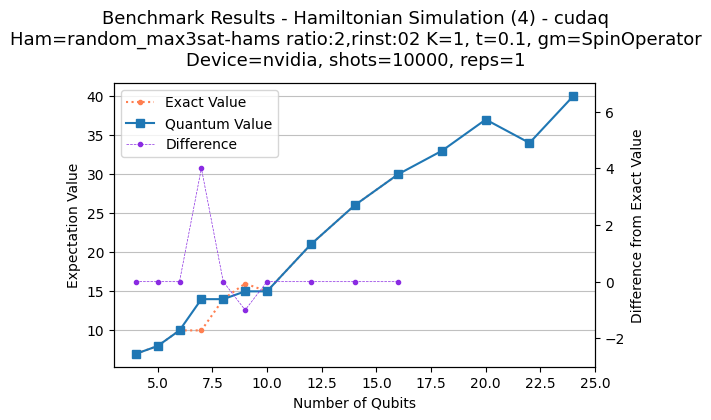

----- Expectation Time Plot -----


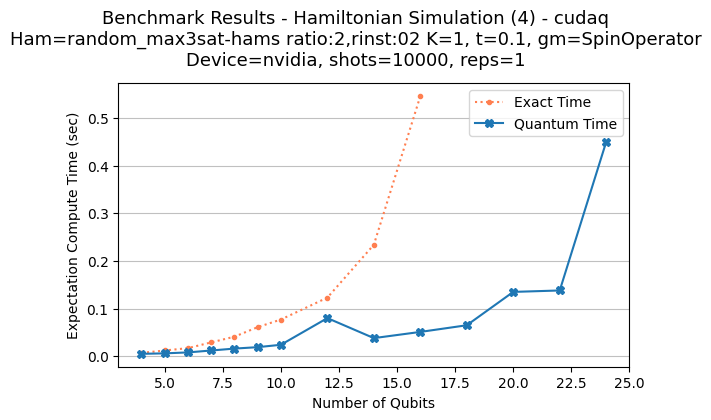

In [8]:
# Max3Sat - ratio 2 rinst 02
hamiltonian_name = 'binaryoptimization/max3sat/random/random_max3sat-hams'
hamiltonian_params = { "ratio": "2", "rinst": "02" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params,
            do_observables = True, group_method = group_method,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - H2


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Mar 30, 2025 23:05:36 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = ham_BK-4
... number of terms in Hamiltonian = 15
... quantum execution time = 0.006
... exact computation time = 0.008 sec

    Exact expectation value, computed classically: -0.5367
    Estimated expectation value, from quantum algorithm: -0.5367
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = ham_BK-6
... number of terms in Hamiltonian = 62
... quantum execution time = 0.021
... exact computation time = 0.046 sec

    Exact expectation value, computed classically: -0.5102
    Estimated expectation value, from quantum algorithm: -0.5102
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 8
... dataset_name = ham_BK-8
... number of terms in Hamiltonian = 185
... qu

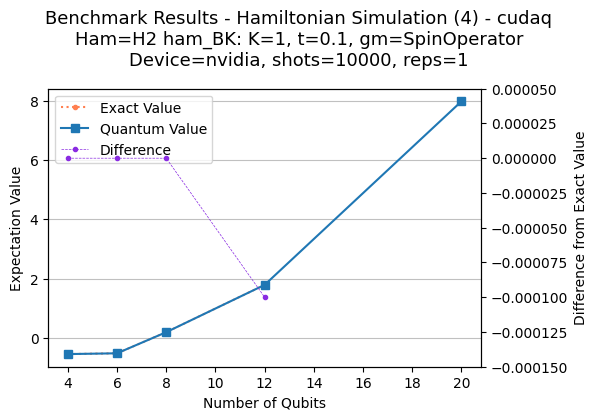

----- Expectation Time Plot -----


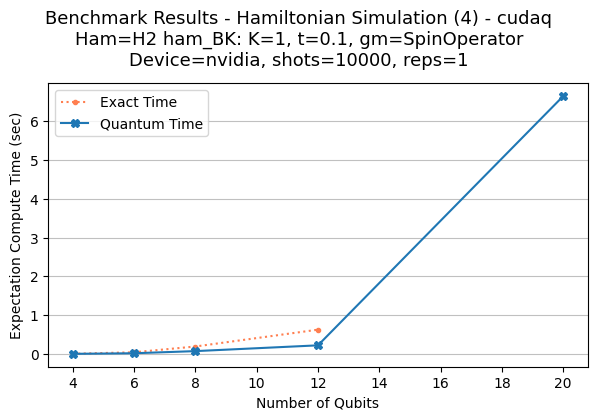

In [9]:
# H2 - BK encoding
hamiltonian_name = 'chemistry/electronic/standard/H2'
hamiltonian_params = { "ham_BK": "" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=min(max_qubits, 20), skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params,
            do_observables = True, group_method = group_method,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - LiH


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Mar 30, 2025 23:05:45 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = ham_BK-4
... number of terms in Hamiltonian = 27
... quantum execution time = 0.009
... exact computation time = 0.014 sec

    Exact expectation value, computed classically: -7.6831
    Estimated expectation value, from quantum algorithm: -7.6831
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 8
... dataset_name = ham_BK-8
... number of terms in Hamiltonian = 105
... quantum execution time = 0.039
... exact computation time = 0.112 sec

    Exact expectation value, computed classically: -7.7889
    Estimated expectation value, from quantum algorithm: -7.7889
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 10
... dataset_name = ham_BK-10
... number of terms in Hamiltonian = 276
...

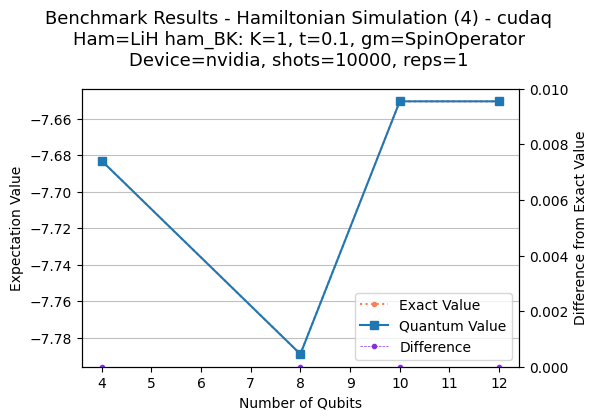

----- Expectation Time Plot -----


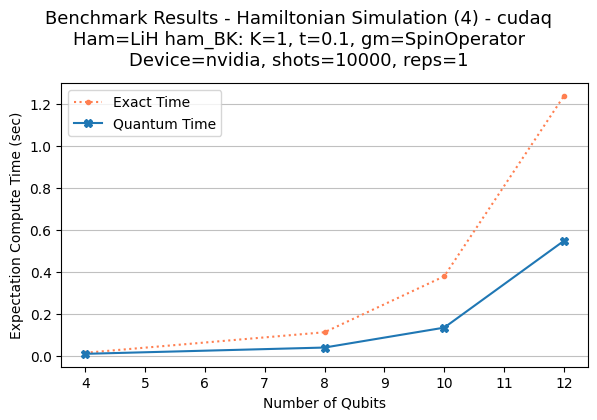

In [10]:
# H2 - BK encoding
hamiltonian_name = 'chemistry/electronic/standard/LiH'
hamiltonian_params = { "ham_BK": "" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=min(max_qubits, 20), skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params,
            do_observables = True, group_method = group_method,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Combined Benchmark Results

In [11]:
import cudaq
print(cudaq.__version__)

CUDA-Q Version cu12-0.10.0 (https://github.com/NVIDIA/cuda-quantum 857dd2ce0a783c32416af8fba8664ff30f9ddc47)
